# iFood CRM Data Analyst Case

# 0-Introdução; libs e missings.

Designar o diretório pertinente

In [1]:
import os
os.chdir('C:/Users/caiof/OneDrive/Área de Trabalho/R vs Python/ifood-data-advanced-analytics-test-master') #substituível#
dir = os.getcwd()
print(dir)

C:\Users\caiof\OneDrive\Área de Trabalho\R vs Python\ifood-data-advanced-analytics-test-master


Carregar libs importantes

In [2]:
#Principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

#Transformação
from sklearn.pipeline import Pipeline
from feature_engine.missing_data_imputers import ArbitraryNumberImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler
from feature_engine.missing_data_imputers import CategoricalVariableImputer
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.model_selection import train_test_split


#Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


#Comparativos
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

Carregar o data frame e observar o tipo de dados em que se encontra

In [3]:
df_ml_data = pd.read_csv(f'C:/Users/caiof/OneDrive/Área de Trabalho/R vs Python/ifood-data-advanced-analytics-test-master/ml_project1_data.csv', sep=',')

Valores perdidos

In [4]:
missing = pd.Series(df_ml_data.isna().sum())
missing_prop = pd.Series(df_ml_data.isna().sum() / df_ml_data.shape[0])
pd.DataFrame({'NAN': missing, 'Proporção': missing_prop, 'Tipo': df_ml_data.dtypes})

,NAN,Proporção,Tipo
ID,0,0.000000,int64
Year_Birth,0,0.000000,int64
Education,0,0.000000,object
Marital_Status,0,0.000000,object
Income,24,0.010714,float64
Kidhome,0,0.000000,int64
Teenhome,0,0.000000,int64
Dt_Customer,0,0.000000,object
Recency,0,0.000000,int64
MntWines,0,0.000000,int64


In [5]:
len(df_ml_data.ID.unique())

df_ml_data.drop_duplicates()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# 1-1Análise Exploratória; dados qualitativos.

In [6]:
#olhando apenas os atributos qualitativos#

Atributos_Individuais = df_ml_data[['Marital_Status','Education']] 
Atributos_Agrupados = pd.DataFrame(Atributos_Individuais.groupby(['Education','Marital_Status']).agg('size'))
Atributos_Agrupados.columns = ['Pessoas']
Atributos_Agrupados['Percentual'] = Atributos_Agrupados['Pessoas'] / 2240
Atributos_Agrupados

Pessoas  Percentual
Education  Marital_Status                     
2n Cycle   Divorced             23    0.010268
           Married              81    0.036161
           Single               37    0.016518
           Together             57    0.025446
           Widow                 5    0.002232
Basic      Divorced              1    0.000446
           Married              20    0.008929
           Single               18    0.008036
           Together             14    0.006250
           Widow                 1    0.000446
Graduation Absurd                1    0.000446
           Alone                 1    0.000446
           Divorced            119    0.053125
           Married             433    0.193304
           Single              252    0.112500
           Together            286    0.127679
           Widow                35    0.015625
Master     Absurd                1    0.000446
           Alone                 1    0.000446
           Divorced             37    0.016518
           Married             138    0.061607
           Single               75    0.033482
           Together            106    0.047321
           Widow                12    0.005357
PhD        Alone                 1    0.000446
           Divorced             52    0.023214
           Married             192    0.085714
           Single               98    0.043750
           Together            117    0.052232
           Widow                24    0.010714
           YOLO                  2    0.000893

Mesmo sem observarmos a renda dos indivíduos, notamos a concentração da amostra com educação superior e além.
Isso já implica que se trata de uma amostra com poder aquisitivo relevante dada a ligação estrita entre renda e educação.

# 1-2Análise Exploratória; dados quantitativos

In [7]:
df_ml_Quant  =  df_ml_data[['Year_Birth','Income', 'Recency','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts','MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth','Z_CostContact','Z_Revenue']] 
df_ml_Quant.describe().round(2)

,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.00,2216.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.00,2240.0,2240.0
mean,1968.81,52247.25,49.11,303.94,26.30,166.95,37.53,27.06,44.02,2.33,4.08,2.66,5.79,5.32,3.0,11.0
std,11.98,25173.08,28.96,336.60,39.77,225.72,54.63,41.28,52.17,1.93,2.78,2.92,3.25,2.43,0.0,0.0
min,1893.00,1730.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,3.0,11.0
25%,1959.00,35303.00,24.00,23.75,1.00,16.00,3.00,1.00,9.00,1.00,2.00,0.00,3.00,3.00,3.0,11.0
50%,1970.00,51381.50,49.00,173.50,8.00,67.00,12.00,8.00,24.00,2.00,4.00,2.00,5.00,6.00,3.0,11.0
75%,1977.00,68522.00,74.00,504.25,33.00,232.00,50.00,33.00,56.00,3.00,6.00,4.00,8.00,7.00,3.0,11.0
max,1996.00,666666.00,99.00,1493.00,199.00,1725.00,259.00,263.00,362.00,15.00,27.00,28.00,13.00,20.00,3.0,11.0


In [8]:
# número de possivelmente errados de data de nascimento #
Nascimento = df_ml_Quant['Year_Birth']
Nascimento[Nascimento < 1940]

192    1900
239    1893
339    1899
Name: Year_Birth, dtype: int64

In [9]:
#removendo as linhas com preenchimento errado de data de nascimento 


df_ml_Quant = df_ml_Quant.drop(df_ml_Quant[df_ml_Quant.Year_Birth < 1940].index) 
## (alterando o data frame pricipal) ##

df_ml_data = df_ml_data.drop(df_ml_data[df_ml_data.Year_Birth < 1940].index) 
df_ml_data[df_ml_data.Year_Birth < 1940]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [10]:
# número de possivelmente errados de renda #
Renda = df_ml_data['Income']
Renda[Renda > 90000]

116      90765.0
124     101970.0
140      92859.0
164     157243.0
203     102160.0
252     102692.0
390      90300.0
418      91065.0
424      93027.0
426      92910.0
591      92163.0
617     162397.0
646     105471.0
650      98777.0
655     153924.0
687     160803.0
703      90247.0
814      91820.0
826      93404.0
914      95529.0
943      94384.0
966      92955.0
1001     95169.0
1031     91700.0
1113     98777.0
1179     90638.0
1261     90687.0
1300    157733.0
1301     94384.0
1333     90842.0
1385     92344.0
1432     92533.0
1458     93790.0
1473     94871.0
1572     90638.0
1601     90226.0
1653    157146.0
1721     92491.0
1722     90273.0
1808     90369.0
1897     90933.0
1898    113734.0
1910     92556.0
1922     91249.0
1958     96843.0
1982     94642.0
1992     91712.0
1993     94472.0
1995     96547.0
2012     96876.0
2132    156924.0
2167     91172.0
2233    666666.0
Name: Income, dtype: float64

In [11]:
#removendo as linhas com preenchimento errado de renda#

df_ml_Quant = df_ml_Quant.drop(df_ml_Quant[df_ml_Quant.Income == 666666.0].index)

## (alterando o data frame pricipal) ##
df_ml_data = df_ml_data.drop(df_ml_data[df_ml_data.Income == 666666.0].index) 

In [12]:
## Aproveitando e substituindo os NAN pela média##
df_ml_Quant = df_ml_Quant.fillna(52247.25)

## (alterando o data frame pricipal) ##
df_ml_data = df_ml_data.fillna(52247.25) 

In [13]:
## Retirando as constantes##
df_ml_Quant = df_ml_Quant.drop(df_ml_Quant[['Z_CostContact','Z_Revenue']], axis = 1)

## (alterando o data frame pricipal) ##
df_ml_data = df_ml_data.drop(df_ml_data[['Z_CostContact','Z_Revenue']], axis = 1) 

In [14]:
df_ml_data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,3,6,5,0,0,0,0,0,0,0


# 1-2.1 Análise Exploratória; correlograma 

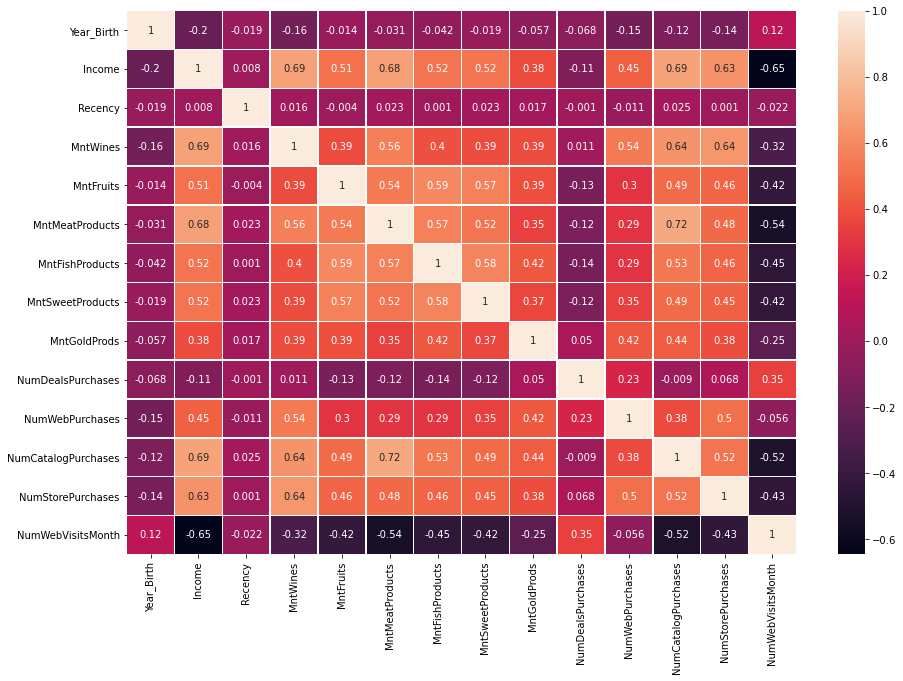

In [41]:
df_ml_Corr   =  df_ml_Quant.corr().round(3)
plt.figure(figsize=(15,10))
Heat = sns.heatmap(df_ml_Corr, annot=True, linewidths=.5)

Observando o correlegrama podemos inferir uma causalidade partindo de Renda -> Gastos[Vinhos,Carne] -> Compras[Catálogo,Lojas]

#Resumindo#
 
A renda leva a propensão de consumo por determinados produtos e, por conseguinte, a necessidade pelos produtos nos leva à escolha do tipo de compra; catálogo ou lojas.

#  1-2.2 Análise Exploratória; gráficos sobre a causalidade

1-2.2.1 Gráfico de renda e despesa com vinhos.

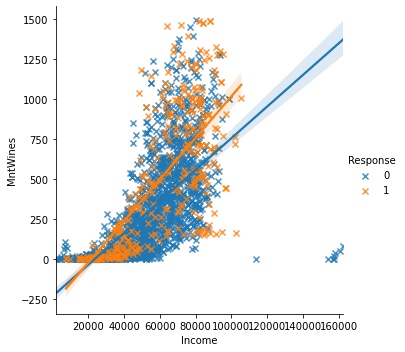

In [16]:
sns.lmplot(data=df_ml_data, x='Income', y='MntWines', hue='Response', markers = ["x","x"] )

1-2.2.2 Gráfico com renda e gastos com produtos de carne

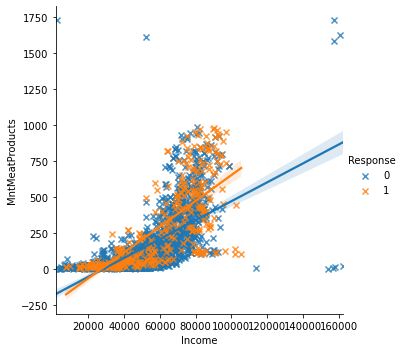

In [17]:
sns.lmplot(data=df_ml_data, x='Income', y='MntMeatProducts', hue='Response', markers = ["x","x"])

O maior consumo de vinho e carne tem alguma relevância para a resposta positiva. Como o consumo acarreta na compra via catálogo e loja - vide correlograma - é prudente ultilizar apenas as últimas variáveis, como intuímos na nota de 1-2.1. 

# 2-1 LOGIT

# 2-1.1 Logit Geral

Vamos começar com uma inferencia sobre a maior quantidade variáveis possíveis no intuito de discriminarmos o que determina a resposta positiva. 

In [18]:
Y = df_ml_data['Response']
X = df_ml_data.drop(df_ml_data[['Response','Dt_Customer','ID']], axis = 1)
X = pd.get_dummies(X, columns=['Marital_Status','Education'], prefix='', prefix_sep='')#Vamos transformar as variáveis categóricas que ainda não estão no formato 1 ou 0

Como nosso intuito ainda é pensar em uma inferência; não é necessário separar a amostra de treino e teste, no momento.

In [19]:
Logit_1 = sm.Logit(Y,X).fit()
print(Logit_1.summary2())

Optimization terminated successfully.
         Current function value: 0.270513
         Iterations 8
                                  Results: Logit
Model:                    Logit                 Pseudo R-squared:      0.358      
Dependent Variable:       Response              AIC:                   1277.7358  
Date:                     2020-12-07 19:00      BIC:                   1471.9589  
No. Observations:         2236                  Log-Likelihood:        -604.87    
Df Model:                 33                    LL-Null:               -942.75    
Df Residuals:             2202                  LLR p-value:           5.7877e-121
Converged:                1.0000                Scale:                 1.0000     
No. Iterations:           8.0000                                                  
----------------------------------------------------------------------------------
                     Coef.    Std.Err.      z    P>|z|      [0.025       0.975]   
-------------------

O erro padrão dos qualitativas referentes à "Marital Status" e "Education" estão absurdos.

Interpretação das probabilidades.

In [20]:
np.exp(Logit_1.params)/(1+np.exp(Logit_1.params))

Year_Birth             0.498031
Income                 0.499999
Kidhome                0.545522
Teenhome               0.276869
Recency                0.492860
MntWines               0.500045
MntFruits              0.500732
MntMeatProducts        0.500556
MntFishProducts        0.500035
MntSweetProducts       0.500174
MntGoldProds           0.500899
NumDealsPurchases      0.528237
NumWebPurchases        0.520759
NumCatalogPurchases    0.518840
NumStorePurchases      0.467737
NumWebVisitsMonth      0.554367
AcceptedCmp3           0.852864
AcceptedCmp4           0.738008
AcceptedCmp5           0.846219
AcceptedCmp1           0.758206
AcceptedCmp2           0.802740
Complain               0.540347
Absurd                 0.995883
Alone                  0.995516
Divorced               0.994422
Married                0.982002
Single                 0.994520
Together               0.982239
Widow                  0.994994
YOLO                   0.995519
2n Cycle               0.999561
Basic   

Alguns valores de probabilidade estão muito elevados, como por exemplo o "Income". Porque?

# 2-1.2 Logit Reduzido

Vamos nos ater apenas à variáveis significativas e considerando a ideia proposta em 1-2.1

In [21]:
X_b = df_ml_data.drop(df_ml_data[['Response','Dt_Customer','ID','Year_Birth','Income','Marital_Status','Education','NumWebVisitsMonth','Complain', 'NumWebVisitsMonth', 'MntSweetProducts', 'MntFruits', 'Kidhome','MntFishProducts','MntGoldProds','MntWines','MntMeatProducts'  ]], axis = 1)

In [22]:
Logit_2 = sm.Logit(Y,X_b).fit()
print(Logit_2.summary2())

Optimization terminated successfully.
         Current function value: 0.314935
         Iterations 7
                           Results: Logit
Model:               Logit             Pseudo R-squared:  0.253     
Dependent Variable:  Response          AIC:               1430.3884 
Date:                2020-12-07 19:00  BIC:               1493.2253 
No. Observations:    2236              Log-Likelihood:    -704.19   
Df Model:            10                LL-Null:           -942.75   
Df Residuals:        2225              LLR p-value:       3.4344e-96
Converged:           1.0000            Scale:             1.0000    
No. Iterations:      7.0000                                         
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
Teenhome            -1.1143   0.1591  -7.0038 0.0000 -1.4262 -0.8025
Recency             -0.0351 

Interpretação da razão de log

In [23]:
np.exp(Logit_2.params)/(1+np.exp(Logit_2.params))

Teenhome               0.247066
Recency                0.491222
NumDealsPurchases      0.528049
NumWebPurchases        0.521866
NumCatalogPurchases    0.529524
NumStorePurchases      0.442717
AcceptedCmp3           0.822419
AcceptedCmp4           0.746146
AcceptedCmp5           0.842089
AcceptedCmp1           0.756749
AcceptedCmp2           0.817050
dtype: float64

Ainda estão muito altos!

# 2-1.2.1 Logit Reduzido com intercepto

In [24]:
X_b_1 = sm.add_constant(X_b)

In [25]:
Logit_2_1 = sm.Logit(Y,X_b_1).fit()
print(Logit_2_1.summary2())

Optimization terminated successfully.
         Current function value: 0.303286
         Iterations 7
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.281      
Dependent Variable:  Response         AIC:              1380.2947  
Date:                2020-12-07 19:00 BIC:              1448.8441  
No. Observations:    2236             Log-Likelihood:   -678.15    
Df Model:            11               LL-Null:          -942.75    
Df Residuals:        2224             LLR p-value:      1.8908e-106
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      7.0000                                        
-------------------------------------------------------------------
                     Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
const               -1.4136   0.2011 -7.0283 0.0000 -1.8079 -1.0194
Teenhome            -1.0205   0.1658 -6.1

Vamos optar pelo modelo reduzido com intercepto

# 3 Treinamento e teste

Usando as variáveis do modelo Logit_2_1; Separar amostra para treino e para teste

In [26]:
#Apesar da variável do tipo 'AcceptCmpx' ser categórica, podemos mantê-la como númerica#
num_vars = ['Teenhome','Recency','NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4']
features = num_vars
target = 'Response'

In [27]:
X = df_ml_data[features].copy()
y = df_ml_data[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 4 Comparação da mesma especificação em vários modelos.

Repositório das métricas dos modelos

In [28]:
df_metricas = {
    'model': [],
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1': [],
    'auc': []
}

# 4-1Logit

# 4-1.1Pipeline do Logit

usando um processo que permite os modelos sejam feito de maneira restringindo o número de passo, ao contrário das seções anteriores

In [29]:
logit = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
    ('model', LogisticRegression(random_state=42))
])

# 4-1.2Logit sobre a amostra de treino 

In [30]:
logit.fit(X_train, y_train)

y_pred = logit.predict(X_test)
y_prob = logit.predict_proba(X_test)[:,1]


#Calcular as métricas comparativas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)


#Métricas do Logit
df_metricas['model'].append('Logistic Regression')
df_metricas['accuracy'].append(accuracy)
df_metricas['precision'].append(precision)
df_metricas['recall'].append(recall)
df_metricas['f1'].append(f1)
df_metricas['auc'].append(auc)


pd.DataFrame(df_metricas)

,model,accuracy,precision,recall,f1,auc
0,Logistic Regression,0.870536,0.666667,0.268657,0.382979,0.8245


# 4-2Support Vector Machine

# 4-2.1 Pipeline do SVM

In [31]:
svm = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('numeric_scaler', SklearnTransformerWrapper(variables=num_vars, transformer=StandardScaler())),
    ('model', SVC(random_state=42, probability=True))
])

# 4-2.2SVM sobre a amostra de treino

In [32]:
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
y_prob = svm.predict_proba(X_test)[:,1]


##Calcular as métricas comparativas##
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)


#Unindo os resultados do SVM com o LOGIT
df_metricas['model'].append('Support Vector Machine')
df_metricas['accuracy'].append(accuracy)
df_metricas['precision'].append(precision)
df_metricas['recall'].append(recall)
df_metricas['f1'].append(f1)
df_metricas['auc'].append(auc)

pd.DataFrame(df_metricas)


,model,accuracy,precision,recall,f1,auc
0,Logistic Regression,0.870536,0.666667,0.268657,0.382979,0.824500
1,Support Vector Machine,0.875000,0.761905,0.238806,0.363636,0.745289


# 4-3Decision Tree

# 4-3.1 Pipeline Decision Tree

In [33]:
Tree = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('model', DecisionTreeClassifier(random_state=42))
])

# 4-3.2 Decision Tree sobre o treino e cálculo das métricas

In [34]:
# treinando e calculando as métricas
Tree.fit(X_train, y_train)

y_pred = Tree.predict(X_test)
y_prob = Tree.predict_proba(X_test)[:,1]


#Calcular as métricas comparativas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# unindo Logit, SVM e Decision Tree
df_metricas['model'].append('Decision Tree')
df_metricas['accuracy'].append(accuracy)
df_metricas['precision'].append(precision)
df_metricas['recall'].append(recall)
df_metricas['f1'].append(f1)
df_metricas['auc'].append(auc)

pd.DataFrame(df_metricas)



,model,accuracy,precision,recall,f1,auc
0,Logistic Regression,0.870536,0.666667,0.268657,0.382979,0.824500
1,Support Vector Machine,0.875000,0.761905,0.238806,0.363636,0.745289
2,Decision Tree,0.828125,0.434211,0.492537,0.461538,0.695127


# 4-4Random Forest

# 4-4.1 Pipeline da Random Forest

In [35]:
Random = Pipeline(steps=[
    ('numeric_imputer', ArbitraryNumberImputer(variables=num_vars, arbitrary_number=-999)),
    ('model', RandomForestClassifier(random_state=42))
])

# 4-4.2 Random Forest sobre treino e cálculo de métricas

In [36]:
# treinando e calculando as métricas
Random.fit(X_train, y_train)

y_pred = Random.predict(X_test)
y_prob = Random.predict_proba(X_test)[:,1]


#Calcular as métricas comparativas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)

# unindo Logit, SVM, Decision Tree e Random Forest
df_metricas['model'].append('Random Forest')
df_metricas['accuracy'].append(accuracy)
df_metricas['precision'].append(precision)
df_metricas['recall'].append(recall)
df_metricas['f1'].append(f1)
df_metricas['auc'].append(auc)
pd.DataFrame(df_metricas)

,model,accuracy,precision,recall,f1,auc
0,Logistic Regression,0.870536,0.666667,0.268657,0.382979,0.824500
1,Support Vector Machine,0.875000,0.761905,0.238806,0.363636,0.745289
2,Decision Tree,0.828125,0.434211,0.492537,0.461538,0.695127
3,Random Forest,0.879464,0.644444,0.432836,0.517857,0.821131


Optamos pelo Random forest em função da menor presença de falsos negativos e falso positivos quando comparado com o modelo de inferência, o Logit.

In [39]:
df_ml_data.describe().round(0)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,...,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0,2236.0
mean,5589.0,1969.0,51962.0,0.0,1.0,49.0,304.0,26.0,167.0,38.0,...,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,3245.0,12.0,21411.0,1.0,1.0,29.0,337.0,40.0,226.0,55.0,...,3.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,1940.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2828.0,1959.0,35502.0,0.0,0.0,24.0,24.0,1.0,16.0,3.0,...,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,5454.0,1970.0,51684.0,0.0,0.0,49.0,174.0,8.0,67.0,12.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,8422.0,1977.0,68276.0,1.0,1.0,74.0,504.0,33.0,232.0,50.0,...,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,11191.0,1996.0,162397.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,...,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
